In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

2022-12-22 03:01:34.725222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ion = pd.read_csv('./data/ion.csv', index_col=0)
ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [3]:
df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

In [4]:
# splid data into training and validation sets
df_train = df.sample(frac=0.8, random_state=0)
df_valid = df.drop(df_train.index)

In [5]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

In [6]:
# Normalization of data between -1 to 1
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [7]:
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

In [8]:
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

In [9]:
# Define a model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[33,]),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),    
    layers.Dense(1, activation='sigmoid'),
])

2022-12-22 03:01:51.593337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 03:01:51.594756: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [11]:
# Early stopping criteria
early_stopping = keras.callbacks.EarlyStopping(
    patience=50,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [12]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/1000
5/5 [==============================] - 3s 121ms/step - loss: 0.8381 - binary_accuracy: 0.5445 - val_loss: 0.6732 - val_binary_accuracy: 0.7714
Epoch 2/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.6989 - binary_accuracy: 0.5730 - val_loss: 0.6694 - val_binary_accuracy: 0.8286
Epoch 3/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.6588 - binary_accuracy: 0.6512 - val_loss: 0.6581 - val_binary_accuracy: 0.8286
Epoch 4/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5964 - binary_accuracy: 0.6940 - val_loss: 0.6366 - val_binary_accuracy: 0.7857
Epoch 5/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5494 - binary_accuracy: 0.7367 - val_loss: 0.6056 - val_binary_accuracy: 0.7714
Epoch 6/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5355 - binary_accuracy: 0.7402 - val_loss: 0.5802 - val_binary_accuracy: 0.7714
Epoch 7/1000
5/5 [==============================] - 0s 16ms/step - lo

5/5 [==============================] - 0s 12ms/step - loss: 0.1060 - binary_accuracy: 0.9680 - val_loss: 0.4353 - val_binary_accuracy: 0.8429
Epoch 54/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1203 - binary_accuracy: 0.9502 - val_loss: 0.4151 - val_binary_accuracy: 0.8429
Epoch 55/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1190 - binary_accuracy: 0.9537 - val_loss: 0.4133 - val_binary_accuracy: 0.8571
Epoch 56/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1032 - binary_accuracy: 0.9609 - val_loss: 0.4297 - val_binary_accuracy: 0.8571
Epoch 57/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1316 - binary_accuracy: 0.9395 - val_loss: 0.4238 - val_binary_accuracy: 0.8571
Epoch 58/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1179 - binary_accuracy: 0.9573 - val_loss: 0.3387 - val_binary_accuracy: 0.8571
Epoch 59/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.13

5/5 [==============================] - 0s 12ms/step - loss: 0.0804 - binary_accuracy: 0.9751 - val_loss: 0.2700 - val_binary_accuracy: 0.9143
Epoch 106/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1105 - binary_accuracy: 0.9609 - val_loss: 0.2429 - val_binary_accuracy: 0.9286
Epoch 107/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1047 - binary_accuracy: 0.9609 - val_loss: 0.1903 - val_binary_accuracy: 0.9286
Epoch 108/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1024 - binary_accuracy: 0.9786 - val_loss: 0.1435 - val_binary_accuracy: 0.9286
Epoch 109/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.0602 - binary_accuracy: 0.9822 - val_loss: 0.1224 - val_binary_accuracy: 0.9429
Epoch 110/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1587 - binary_accuracy: 0.9502 - val_loss: 0.1225 - val_binary_accuracy: 0.9286
Epoch 111/1000
5/5 [==============================] - 0s 12ms/step - loss

5/5 [==============================] - 0s 13ms/step - loss: 0.0581 - binary_accuracy: 0.9893 - val_loss: 0.0921 - val_binary_accuracy: 0.9714
Epoch 158/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0603 - binary_accuracy: 0.9786 - val_loss: 0.1077 - val_binary_accuracy: 0.9571
Epoch 159/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0444 - binary_accuracy: 0.9858 - val_loss: 0.1365 - val_binary_accuracy: 0.9571
Epoch 160/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0475 - binary_accuracy: 0.9893 - val_loss: 0.2160 - val_binary_accuracy: 0.9286
Epoch 161/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0689 - binary_accuracy: 0.9822 - val_loss: 0.1960 - val_binary_accuracy: 0.9286
Epoch 162/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0766 - binary_accuracy: 0.9751 - val_loss: 0.1920 - val_binary_accuracy: 0.9429
Epoch 163/1000
5/5 [==============================] - 0s 12ms/step - loss

5/5 [==============================] - 0s 12ms/step - loss: 0.0569 - binary_accuracy: 0.9893 - val_loss: 0.2408 - val_binary_accuracy: 0.9286
Epoch 210/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0333 - binary_accuracy: 0.9893 - val_loss: 0.2418 - val_binary_accuracy: 0.9286
Epoch 211/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0452 - binary_accuracy: 0.9893 - val_loss: 0.2402 - val_binary_accuracy: 0.9286
Epoch 212/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0499 - binary_accuracy: 0.9822 - val_loss: 0.2299 - val_binary_accuracy: 0.9286
Epoch 213/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0411 - binary_accuracy: 0.9858 - val_loss: 0.2510 - val_binary_accuracy: 0.9286
Epoch 214/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0436 - binary_accuracy: 0.9858 - val_loss: 0.2187 - val_binary_accuracy: 0.9286
Epoch 215/1000
5/5 [==============================] - 0s 12ms/step - loss

<AxesSubplot: >

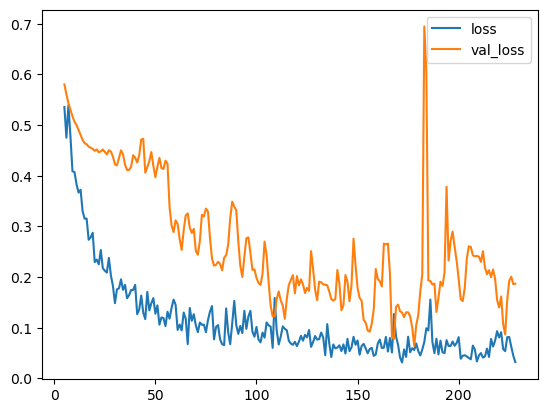

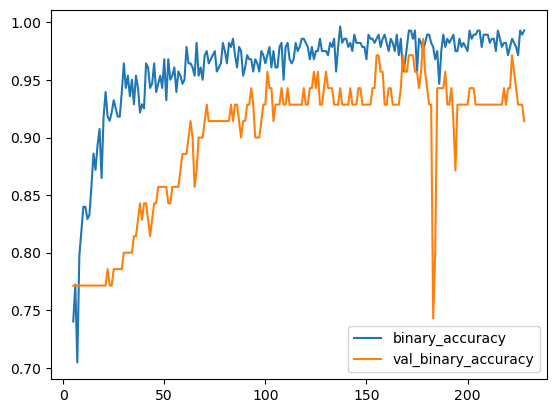

In [13]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

In [ ]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))